(141, 158, 138)


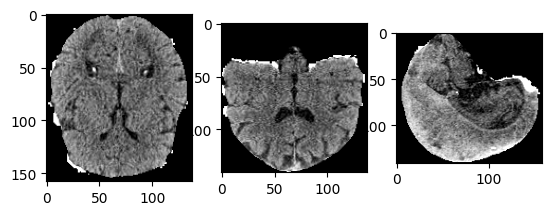

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

def visualize_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray")

def main(file_path):
    # Load the NIfTI file
    img = sitk.ReadImage(file_path)
    
    # Get the bounding box
    label_shape_filter = sitk.LabelShapeStatisticsImageFilter()
    label_shape_filter.Execute(sitk.OtsuThreshold(img, 0, 1, 200))
    bounding_box = label_shape_filter.GetBoundingBox(1)
    
    # Crop the image
    cropped_img = sitk.RegionOfInterest(img, bounding_box[3:6], bounding_box[0:3])
    
    # Convert to numpy array for visualization
    cropped_array = sitk.GetArrayFromImage(cropped_img)
    print(cropped_array.shape)
    # Select slices for visualization
    slices = [
        cropped_array[cropped_array.shape[0] // 2, :, :],
        cropped_array[:, cropped_array.shape[1] // 2, :],
        cropped_array[:, :, cropped_array.shape[2] // 2]
    ]

    # Visualize the slices
    visualize_slices(slices)

# Specify the path to your NIfTI file
file_path = '/home/bruno/xfang/dataset/images/2224_2564111995_ct.nii.gz'

# Run the main function
main(file_path)
